## Trabajo Final - Introducción al Aprendizaje Automático

# Grupo 4: Paul Acosta & Alejo Senra
- Predicción de la potabilidad del agua

***Link al dataset***: [https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability/](https://)

**Fuente**: *Kaggle.com*



---

**Importamos librerías y recursos a utilizar en el Trabajo**

In [ ]:
#IMPORTS
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from matplotlib.patches import Patch





---

**Cargamos dataset en el entorno y guardamos en una variable**

In [ ]:
df = pd.read_csv('/content/water_potability.csv') #Data frame original


dfp = pd.read_csv('/content/water_potability.csv') #Data frame para modificar y hacer pruebas.



---



## 1) **Exploración de datos**
- Luego de investigar un poco sobre el dataset, conocer sus variables y propiedades;
nos adentramos en su exploración para buscar patrones y relaciones que permitan realizar nuestra predicción


# Nueva sección


In [ ]:
#Conversión booleana al target
for i, target in enumerate(dfp['Potability']):
    if target == 0:
      dfp['Potability'][i] = False
    else:
      dfp['Potability'][i] = True



<ipython-input-35-c9a8b8f13a8f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp['Potability'][i] = False


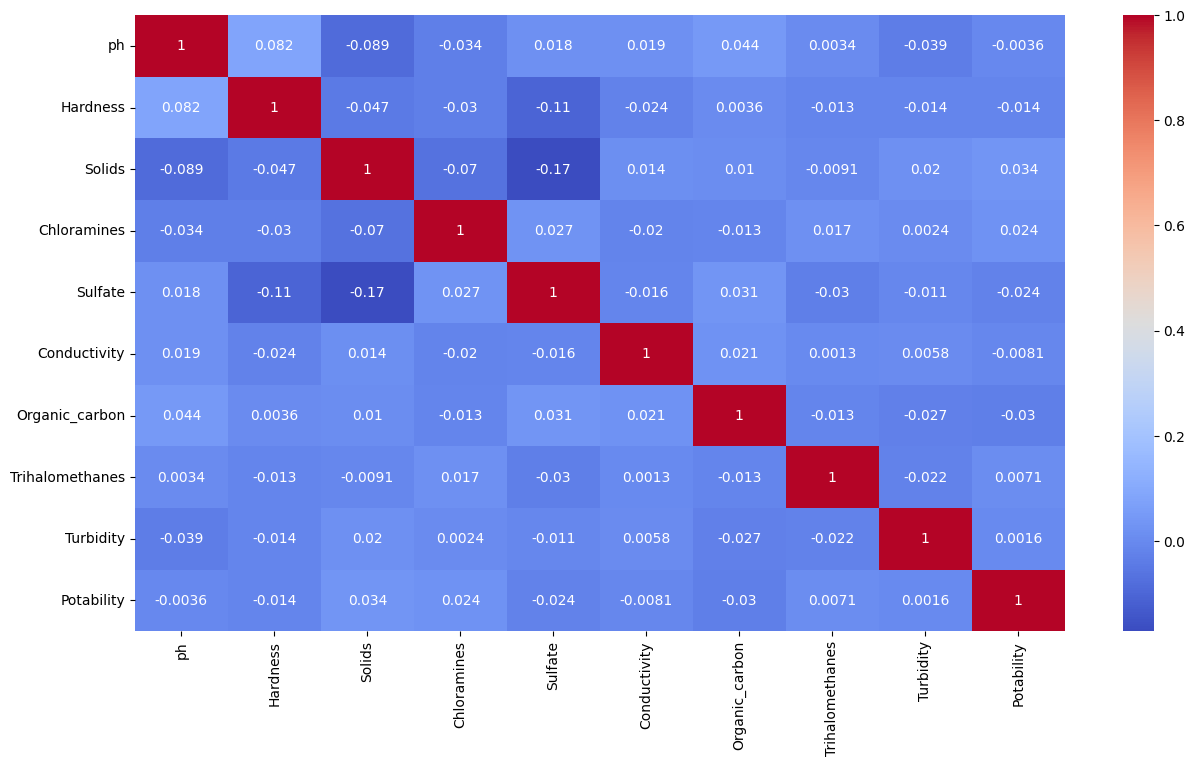

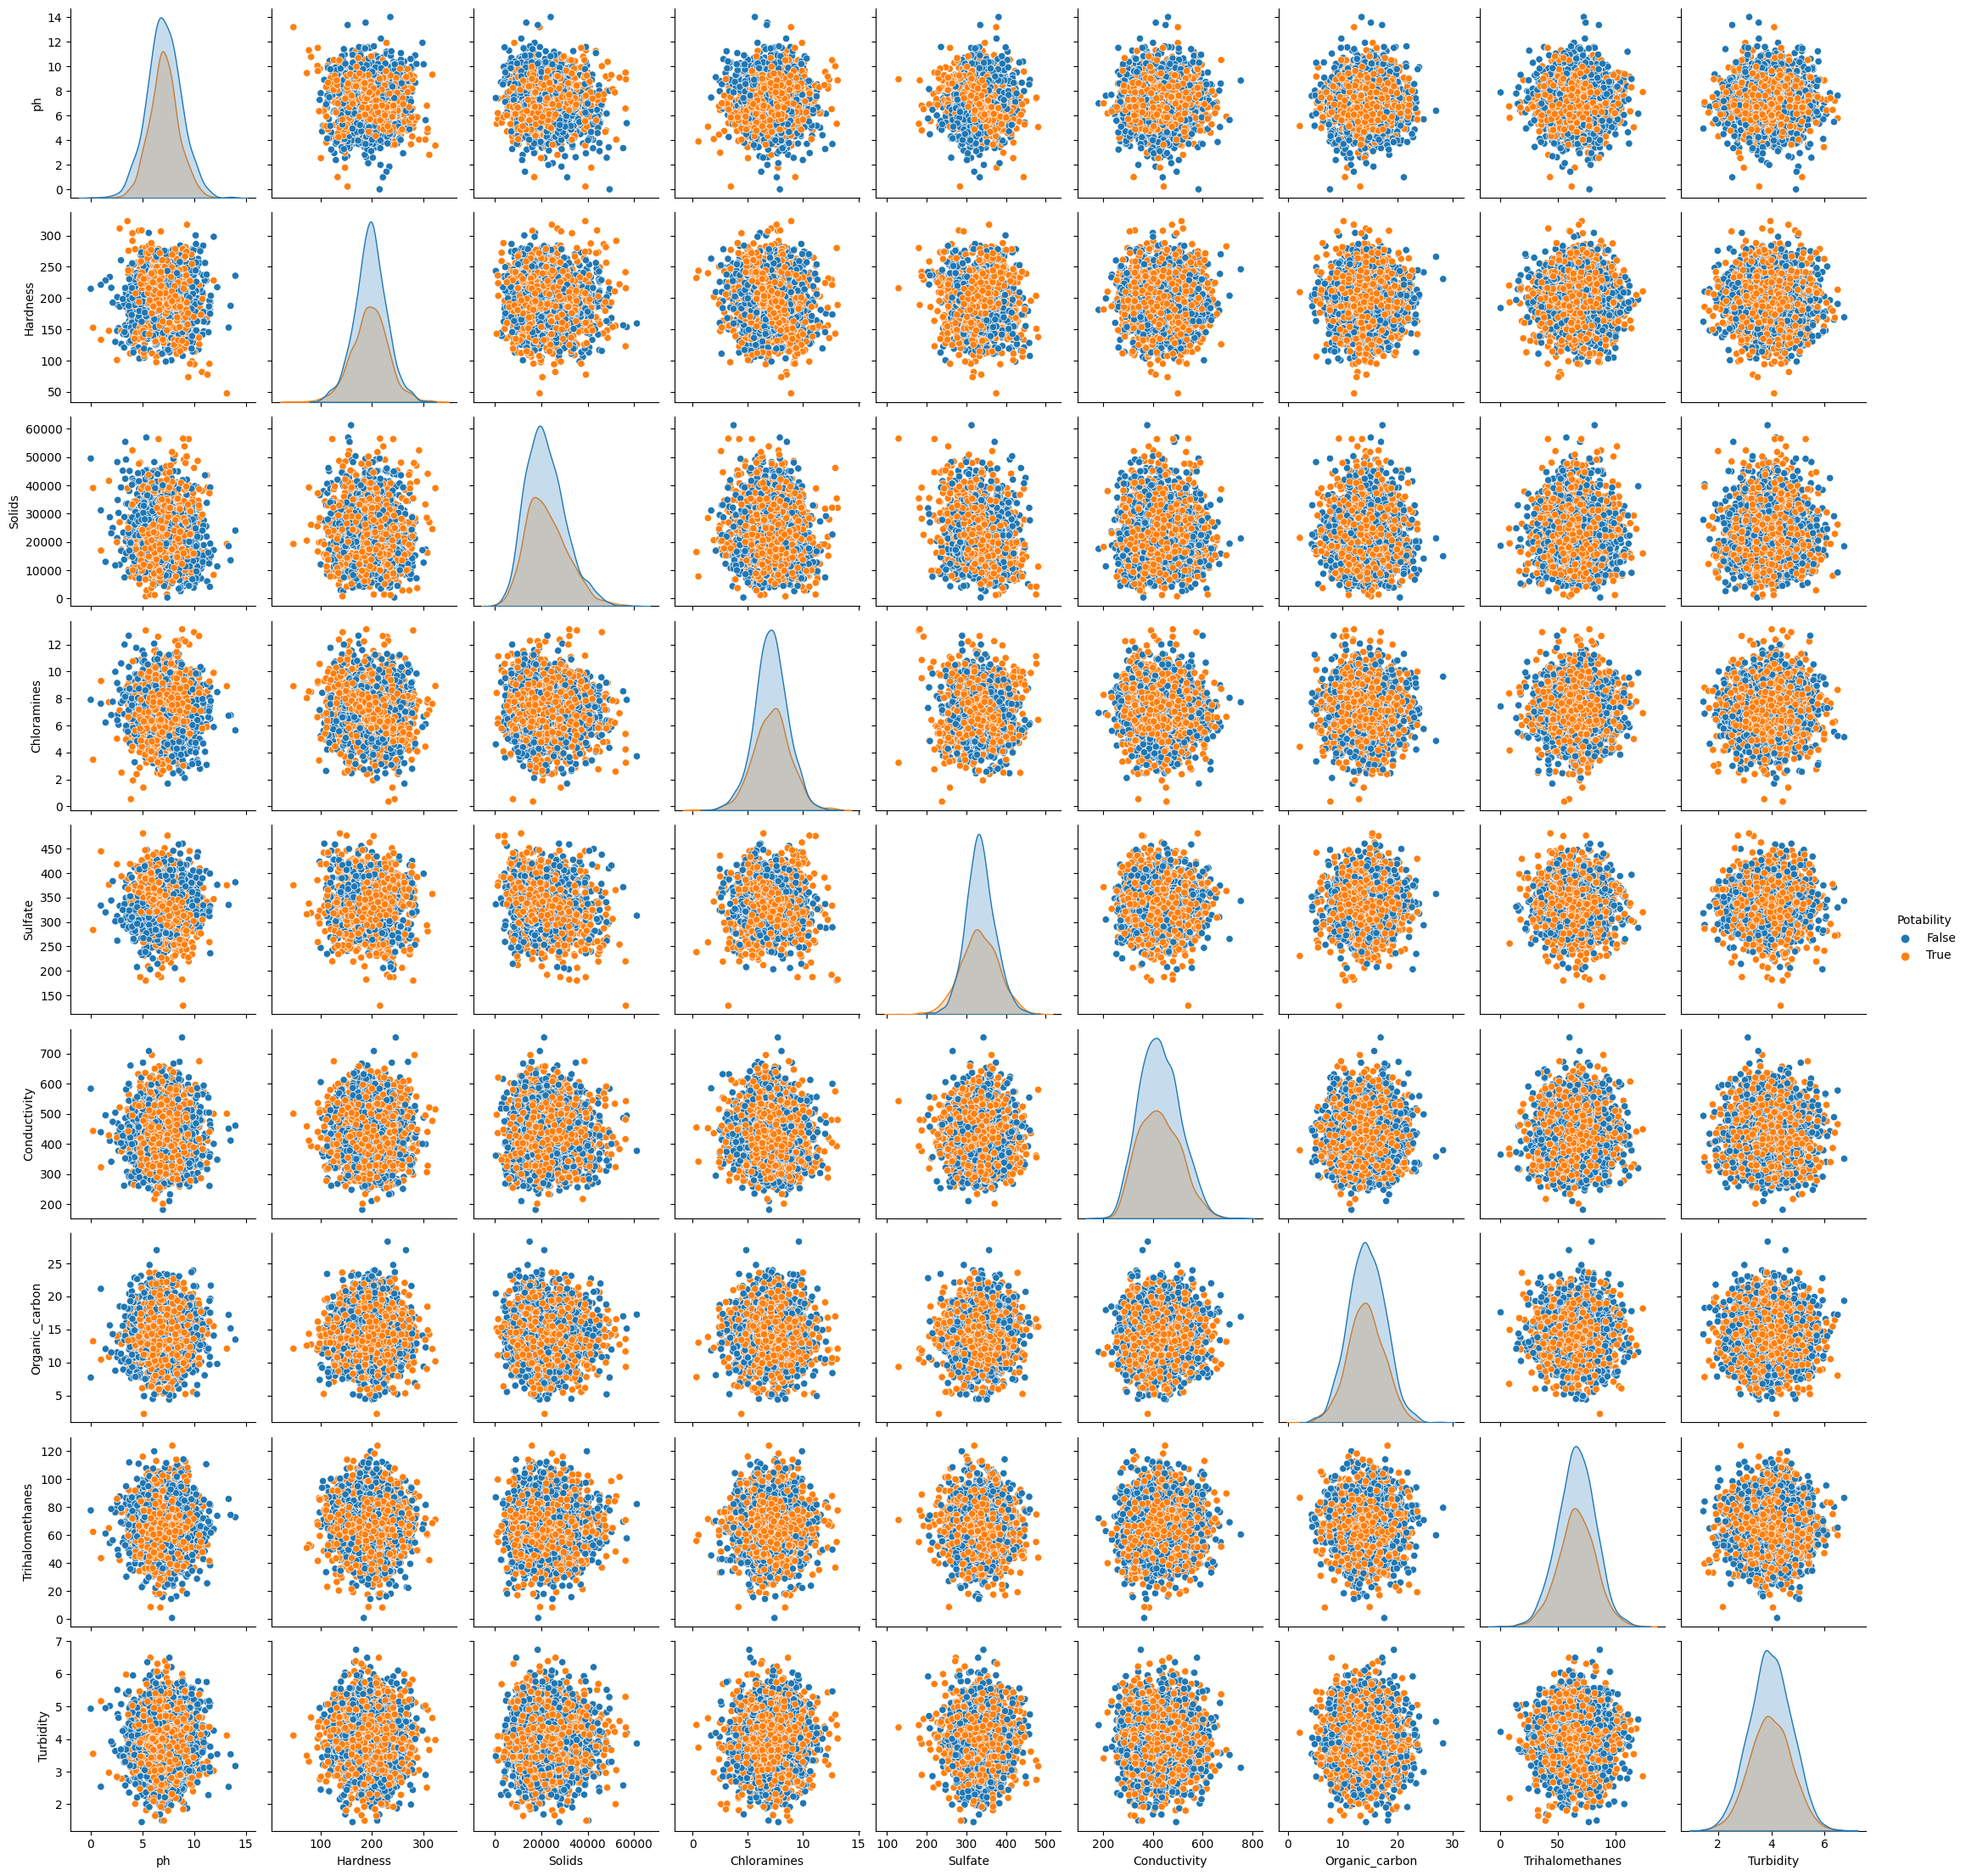

In [ ]:
#Primera exploración --> Scatter plots para encontrar primeros patrones

plt.figure(figsize =(15,8))
sns.heatmap(df.corr(),annot =True,cmap = 'coolwarm')
plt.show()

sns.pairplot(dfp, hue='Potability')


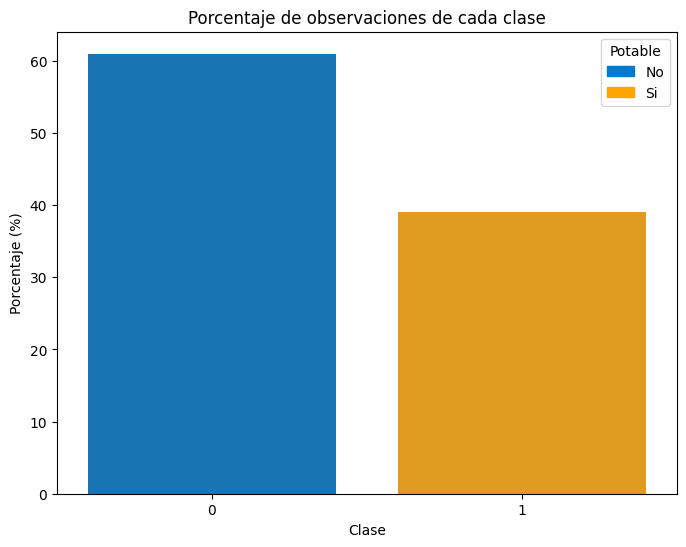

In [ ]:
#Grafico de barras, para mostrar el balance de las clases.

barras=df['Potability']

class_percentages = df['Potability'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
sns.barplot(x=class_percentages.index, y=class_percentages.values, palette=["#007acc", "orange"])

plt.xlabel('Clase')
plt.ylabel('Porcentaje (%)')
plt.title('Porcentaje de observaciones de cada clase')
legend_patches = [Patch(color="#007acc", label='No'), Patch(color="orange", label='Si')]
plt.legend(handles=legend_patches, title='Potable')

plt.show()


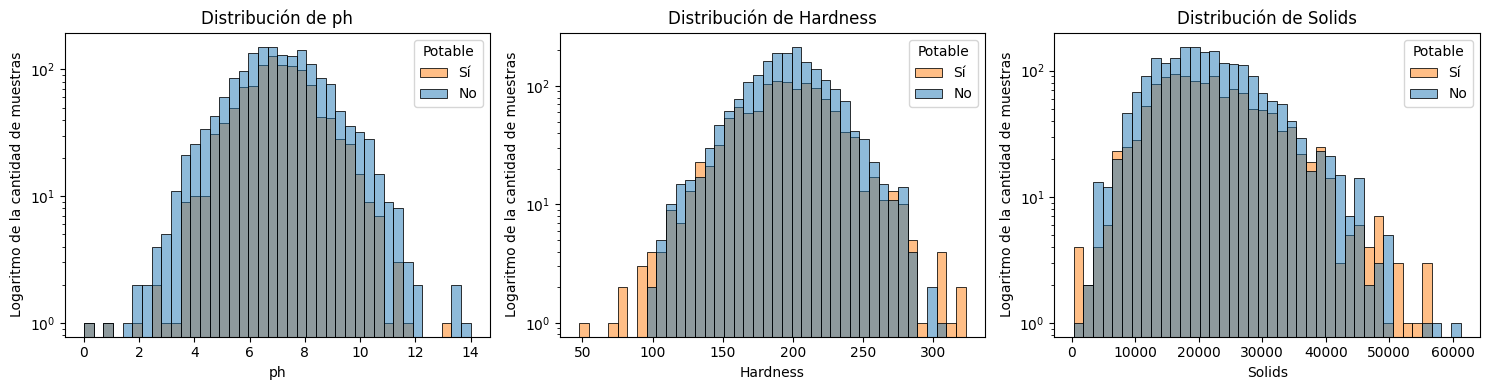

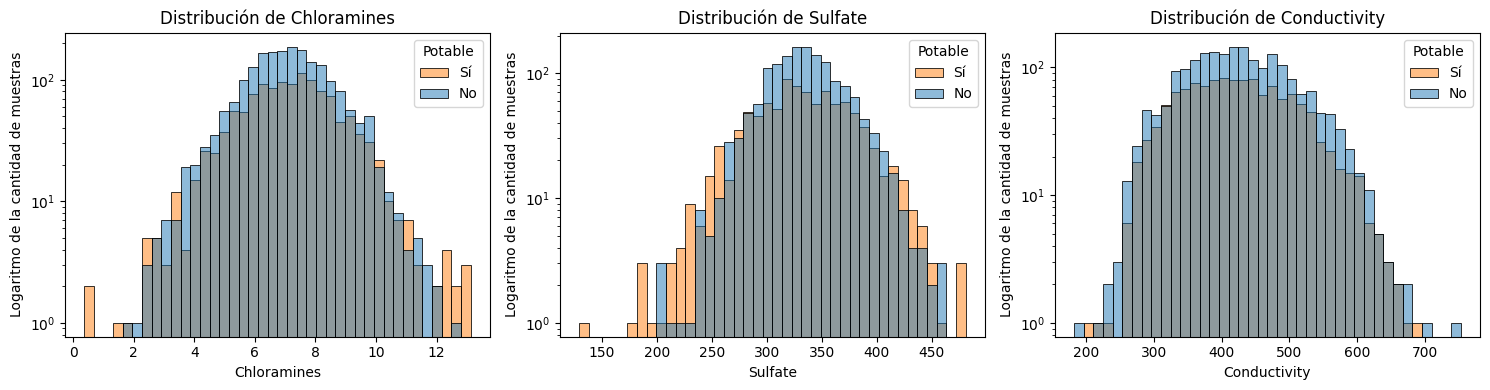

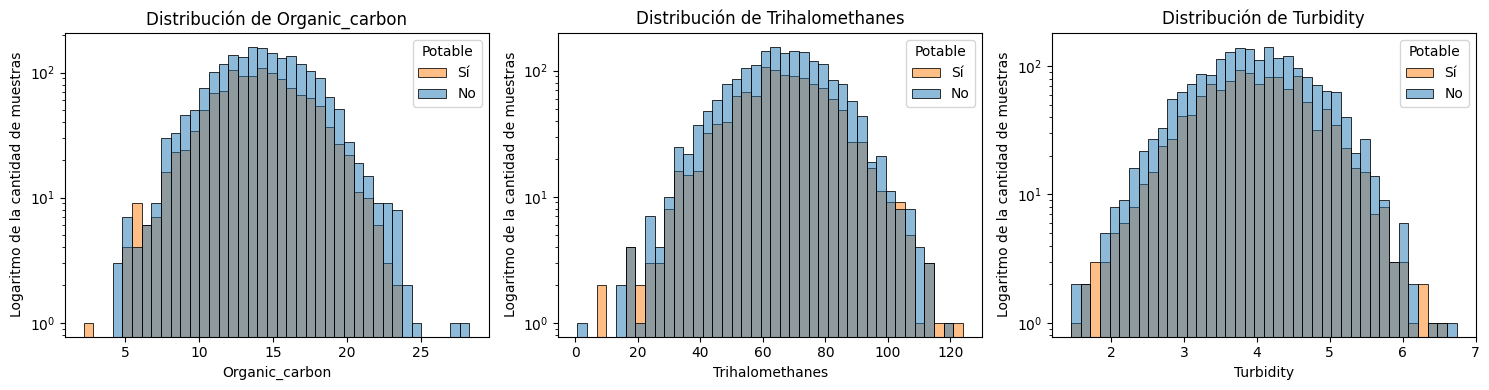

In [ ]:
#Distribucion en df original
columns = df.columns.drop('Potability')

for i in range(0, len(columns), 3):

    col1 = columns[i]
    col2 = columns[i + 1] if i + 1 < len(columns) else None
    col3 = columns[i + 2] if i + 2 < len(columns) else None


    plt.figure(figsize=(15, 4))


    plt.subplot(1, 3, 1)
    sns.histplot(data=df, x=col1, kde=False, hue='Potability', bins=40)
    plt.yscale("log")
    plt.title(f'Distribución de {col1}')
    plt.legend(title='Potable', labels=['Sí', 'No'])
    plt.ylabel('Logaritmo de la cantidad de muestras')


    if col2:
        plt.subplot(1, 3, 2)
        sns.histplot(data=df, x=col2, kde=False, hue='Potability', bins=40)
        plt.yscale("log")
        plt.title(f'Distribución de {col2}')
        plt.legend(title='Potable', labels=['Sí', 'No'])
        plt.ylabel('Logaritmo de la cantidad de muestras')


    if col3:
        plt.subplot(1, 3, 3)
        sns.histplot(data=df, x=col3, kde=False, hue='Potability', bins=40)
        plt.yscale("log")
        plt.title(f'Distribución de {col3}')
        plt.legend(title='Potable', labels=['Sí', 'No'])
        plt.ylabel('Logaritmo de la cantidad de muestras')


    plt.tight_layout()
    plt.show()


<ipython-input-38-f3ba00a5d39b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp2['Potability'][i] = 'No potable'


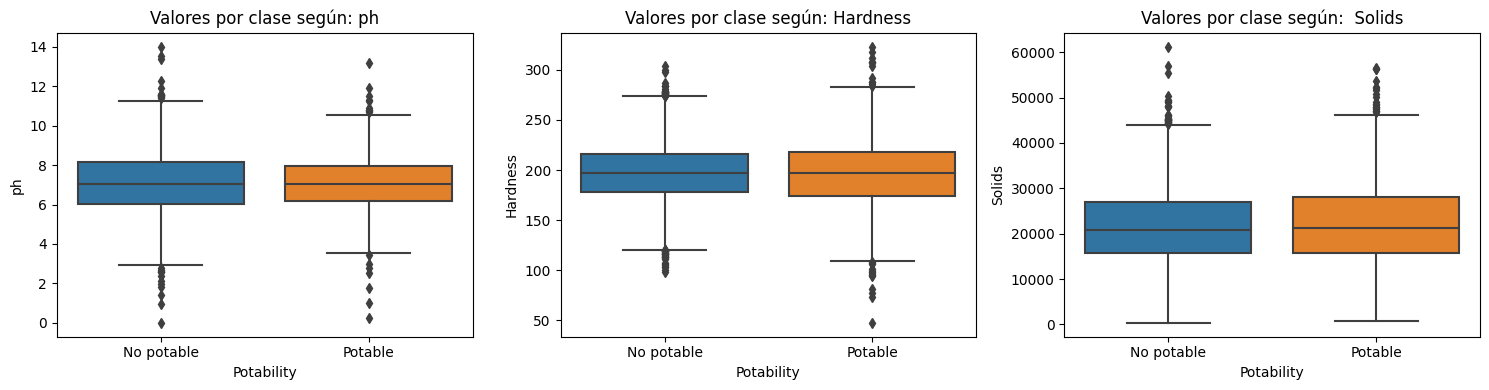

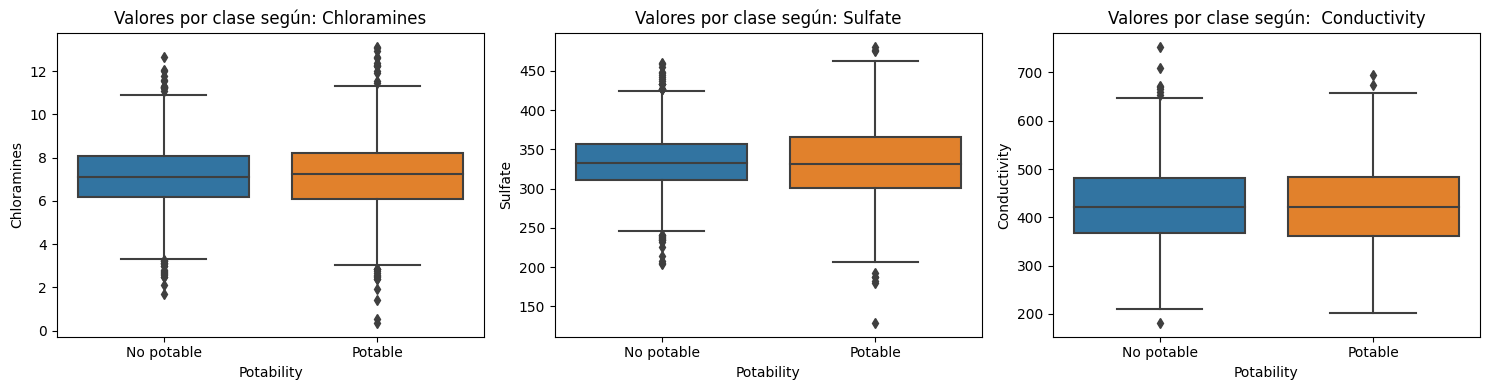

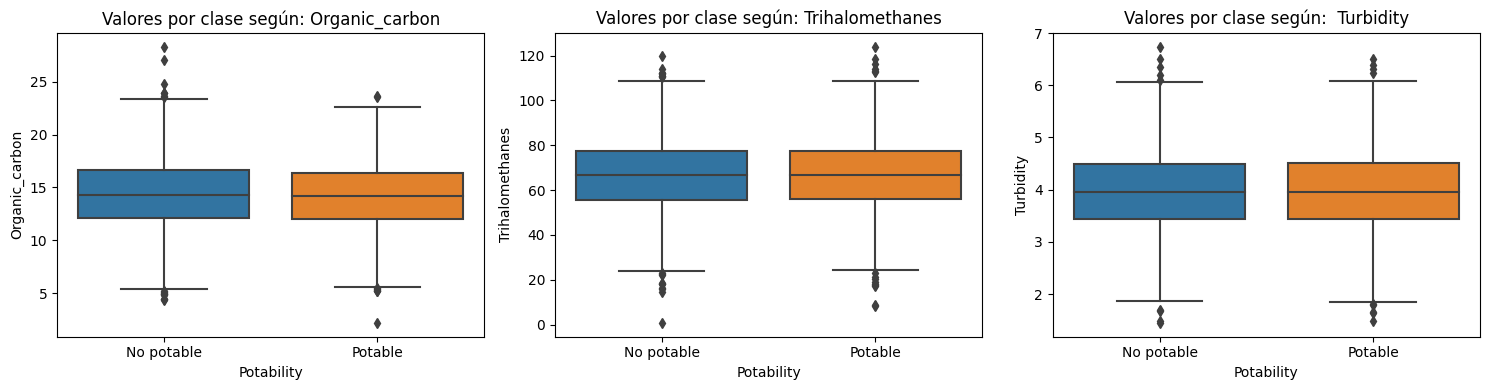

In [ ]:
#Box plots para df original, cómo se comportan las clases en cada feature. ¿Se distinguen o rondan valores parecidos?


### --------------------------------------------------------- ###
#PARA FINES ILUSTRATIVOS:
dfp2 = pd.read_csv('/content/water_potability.csv') #Data frame para modificar y hacer pruebas.
for i, target in enumerate(dfp2['Potability']):
    if target == 0:
      dfp2['Potability'][i] = 'No potable'
    else:
      dfp2['Potability'][i] = 'Potable'
### ---------------------------------------------------------- ###


Cols = [i for i in dfp2.columns if i != 'Potability']

for i in range(0, len(Cols), 3):
    col1 = Cols[i]
    col2 = Cols[i + 1] if i + 1 < len(Cols) else None
    col3 = Cols[i + 2] if i + 2 < len(Cols) else None

    plt.figure(figsize=(15, 4))

    plt.subplot(1, 3, 1)
    sns.boxplot(x=dfp2['Potability'], y=df[col1])
    plt.title(f'Valores por clase según: {col1}')

    if col2:
        plt.subplot(1, 3, 2)
        sns.boxplot(x=dfp2['Potability'], y=df[col2])
        plt.title(f'Valores por clase según: {col2}')

    if col3:
        plt.subplot(1, 3, 3)
        sns.boxplot(x=dfp2['Potability'], y=df[col3])
        plt.title(f'Valores por clase según:  {col3}')

    plt.tight_layout()
    plt.show()


In [ ]:
#Revisamos valores faltantes, NA y NaNs para investigar el dataset antes de seguir con nuestro trabajo
df.query('Potability==0').isna().sum()

ph                 314
Hardness             0
Solids               0
Chloramines          0
Sulfate            488
Conductivity         0
Organic_carbon       0
Trihalomethanes    107
Turbidity            0
Potability           0
dtype: int64



---

#                 2) **Preprocesando antes de modelar**
- Tomamos decisiones sobre datos faltantes y/o errores
- Escalamos los datos
- PCA

In [ ]:
#Imputamos NaNs en una copia del df original con la mediana

dfp.Potability.value_counts()
dfp["ph"]=dfp["ph"].fillna(dfp["ph"].median())
dfp["Sulfate"]=dfp["Sulfate"].fillna(dfp["Sulfate"].median())
dfp["Trihalomethanes"]=dfp["Trihalomethanes"].fillna(dfp["Trihalomethanes"].median())

dfp.isna().sum() #chequeo de éxito en la imputación

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
#Separamos dfp en X e Y:

y = dfp['Potability'] # y guarda los targets
X = dfp.drop('Potability', axis=1) # "Elimino" el target para usar lo demás como X -> axis 1 indica que elimino columna y no fila.


In [ ]:
dfp.describe()


ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.074194   196.369496  22014.092526     7.122277   333.608364   
std       1.470040    32.879761   8768.570828     1.583085    36.143851   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  
count   3276.000000     3276.000000      3276.000000  3276.000000  
mean     426.205111       14.284970        66.407478     3.966786  
std       80.824064        3.308162        15.769958     0.780382  
min      181.483754        2.200000         0.738000     1.450000  
25%      365.734414       12.065801        56.647656     3.439711  
50%      421.884968       14.218338        66.622485     3.955028  
75%      481.792304       16.557652        76.666609     4.500320  
max      753.342620       28.300000       124.000000     6.739000

In [ ]:
# Escalado de datos --> Estandarización del dataset

df_standar = pd.DataFrame(StandardScaler().fit_transform(X))

cov_matrix = df_standar.cov()

cov_matrix

df_standar



0         1         2         3         4         5         6  \
0    -0.025474  0.259195 -0.139471  0.112415  0.965957  1.708954 -1.180651   
1    -2.284717 -2.036414 -0.385987 -0.307694 -0.014799  2.062575  0.270597   
2     0.697319  0.847665 -0.240047  1.360594 -0.014799 -0.094032  0.781117   
3     0.845393  0.547651  0.000493  0.592008  0.644130 -0.778830  1.255134   
4     1.372982 -0.464429 -0.460249 -0.363698 -0.649522 -0.343939 -0.824357   
...        ...       ...       ...       ...       ...       ...       ...   
3271 -1.637002 -0.081758  2.916188  0.028027  0.728872  1.240155 -0.118075   
3272  0.499833 -0.085667 -0.534295  0.593290 -0.014799 -0.417706  1.698560   
3273  1.595654 -0.626829  1.270810  0.144017 -0.014799  0.072263 -0.981329   
3274 -1.324949  1.041355 -1.144058 -0.517373 -0.014799 -0.288597 -0.942064   
3275  0.544611 -0.038546 -0.525812  0.244515 -0.014799 -1.221919  0.560940   

             7         8  
0     1.305434 -1.286298  
1    -0.639186  0.684218  
2     0.000800 -1.167365  
3     2.152154  0.848412  
4    -2.182297  0.138786  
...        ...       ...  
3271  0.017772  0.601124  
3272  0.013636 -1.497627  
3273  0.218038 -0.856007  
3274  0.702756  0.950797  
3275  0.779510 -2.124459  

[3276 rows x 9 columns]

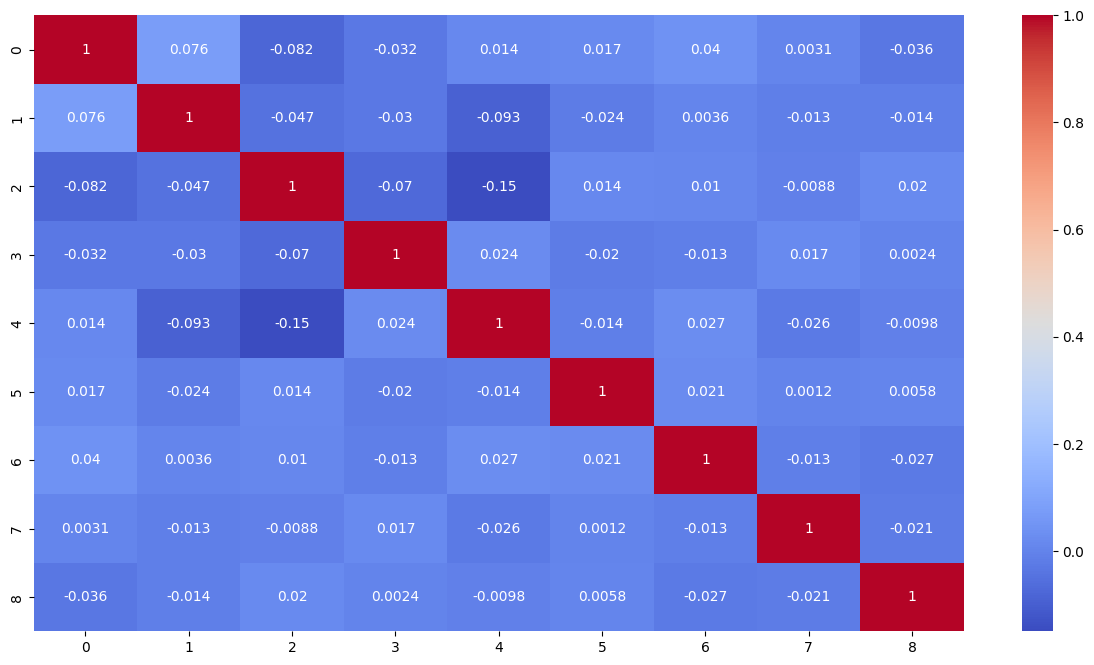

In [ ]:
#Relaciones estandarizadas, chequeamos que haya salido bien el estandarizado.

df_standar_y = pd.DataFrame(StandardScaler().fit_transform(X))

df_standar_y['target'] = y

plt.figure(figsize =(15,8))
sns.heatmap(df_standar.corr(),annot =True,cmap = 'coolwarm') #Chequeo de la matriz de correlacion(para ver si funcionó el estandarizado)
plt.show()



In [ ]:
# Realizamos un Análisis de componentes principales, buscando reducir la dimensionalidad del dataset para ver si esto nos ayuda a encontrar relaciones

pca = PCA()

red_dim = pca.fit_transform(df_standar)

pca_df = pd.DataFrame(red_dim)

pca_df['target'] = y #Agrego target al dataframe resultante del PCA

pca_df


0         1         2         3         4         5         6  \
0    -0.615153  0.013759 -0.035239  1.689525 -1.240867 -0.964821 -1.242419   
1     0.765338  2.406033 -1.870650 -0.089878 -1.096166  0.205864 -0.738266   
2    -0.989116 -0.930208  0.313004  0.734205  0.605919  1.306835 -0.565601   
3    -0.826206 -0.417832  0.474392  1.114870 -0.152722  0.641698  2.420148   
4    -0.207871 -0.601879 -0.080653 -1.837368  0.058569 -0.410180 -1.024945   
...        ...       ...       ...       ...       ...       ...       ...   
3271  2.239667  1.457524 -1.107809  0.092231 -0.276050  0.239809 -0.236103   
3272 -1.115598 -0.744828 -0.611858  0.999385  1.356037  0.981904 -0.076439   
3273  0.286476 -0.387304 -0.049193  0.762971 -0.037501 -0.791075 -0.650237   
3274  0.041581  0.279649  1.450233 -0.515362 -0.720600 -0.620821  0.520590   
3275 -1.071876 -0.786127  0.451692  1.560826  1.702807 -0.216181 -0.168713   

             7         8 target  
0    -0.667780 -1.005817  False  
1    -1.188980  1.315346  False  
2     0.212516 -0.418194  False  
3     0.080512 -0.830430  False  
4     1.594226  0.945861  False  
...        ...       ...    ...  
3271 -0.611321 -2.167220   True  
3272  0.125296  0.447805   True  
3273  1.933128 -0.848436   True  
3274 -1.741222  0.359257   True  
3275  0.264178  0.334090   True  

[3276 rows x 10 columns]

<ipython-input-50-ec7e1d9564b2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(pca_df.corr(),annot =True,cmap = 'coolwarm')


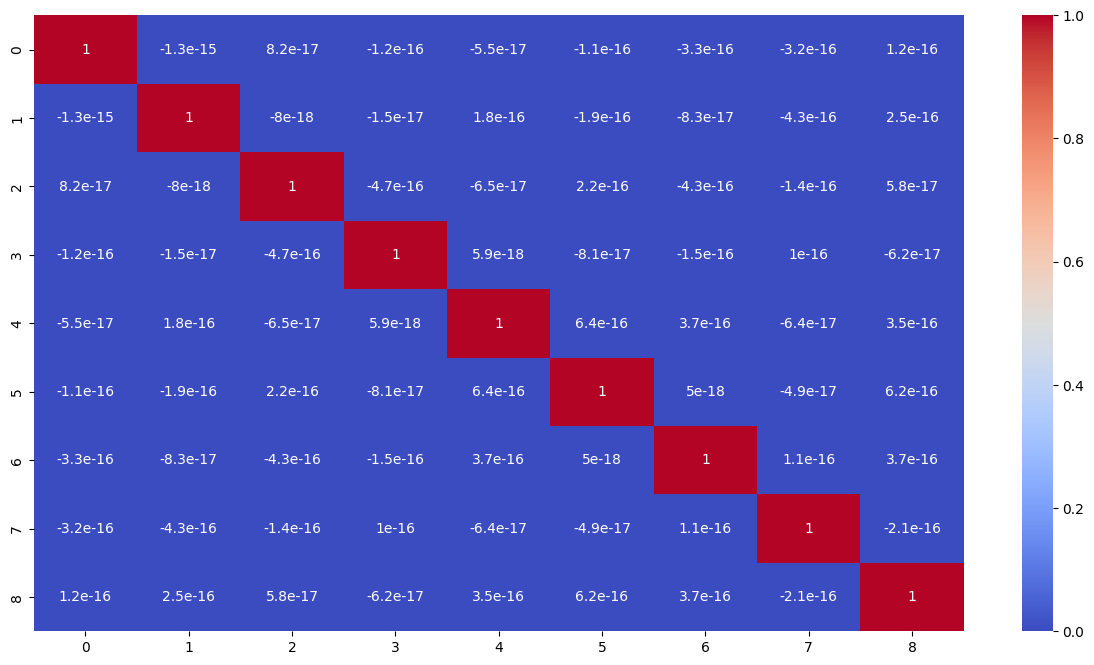

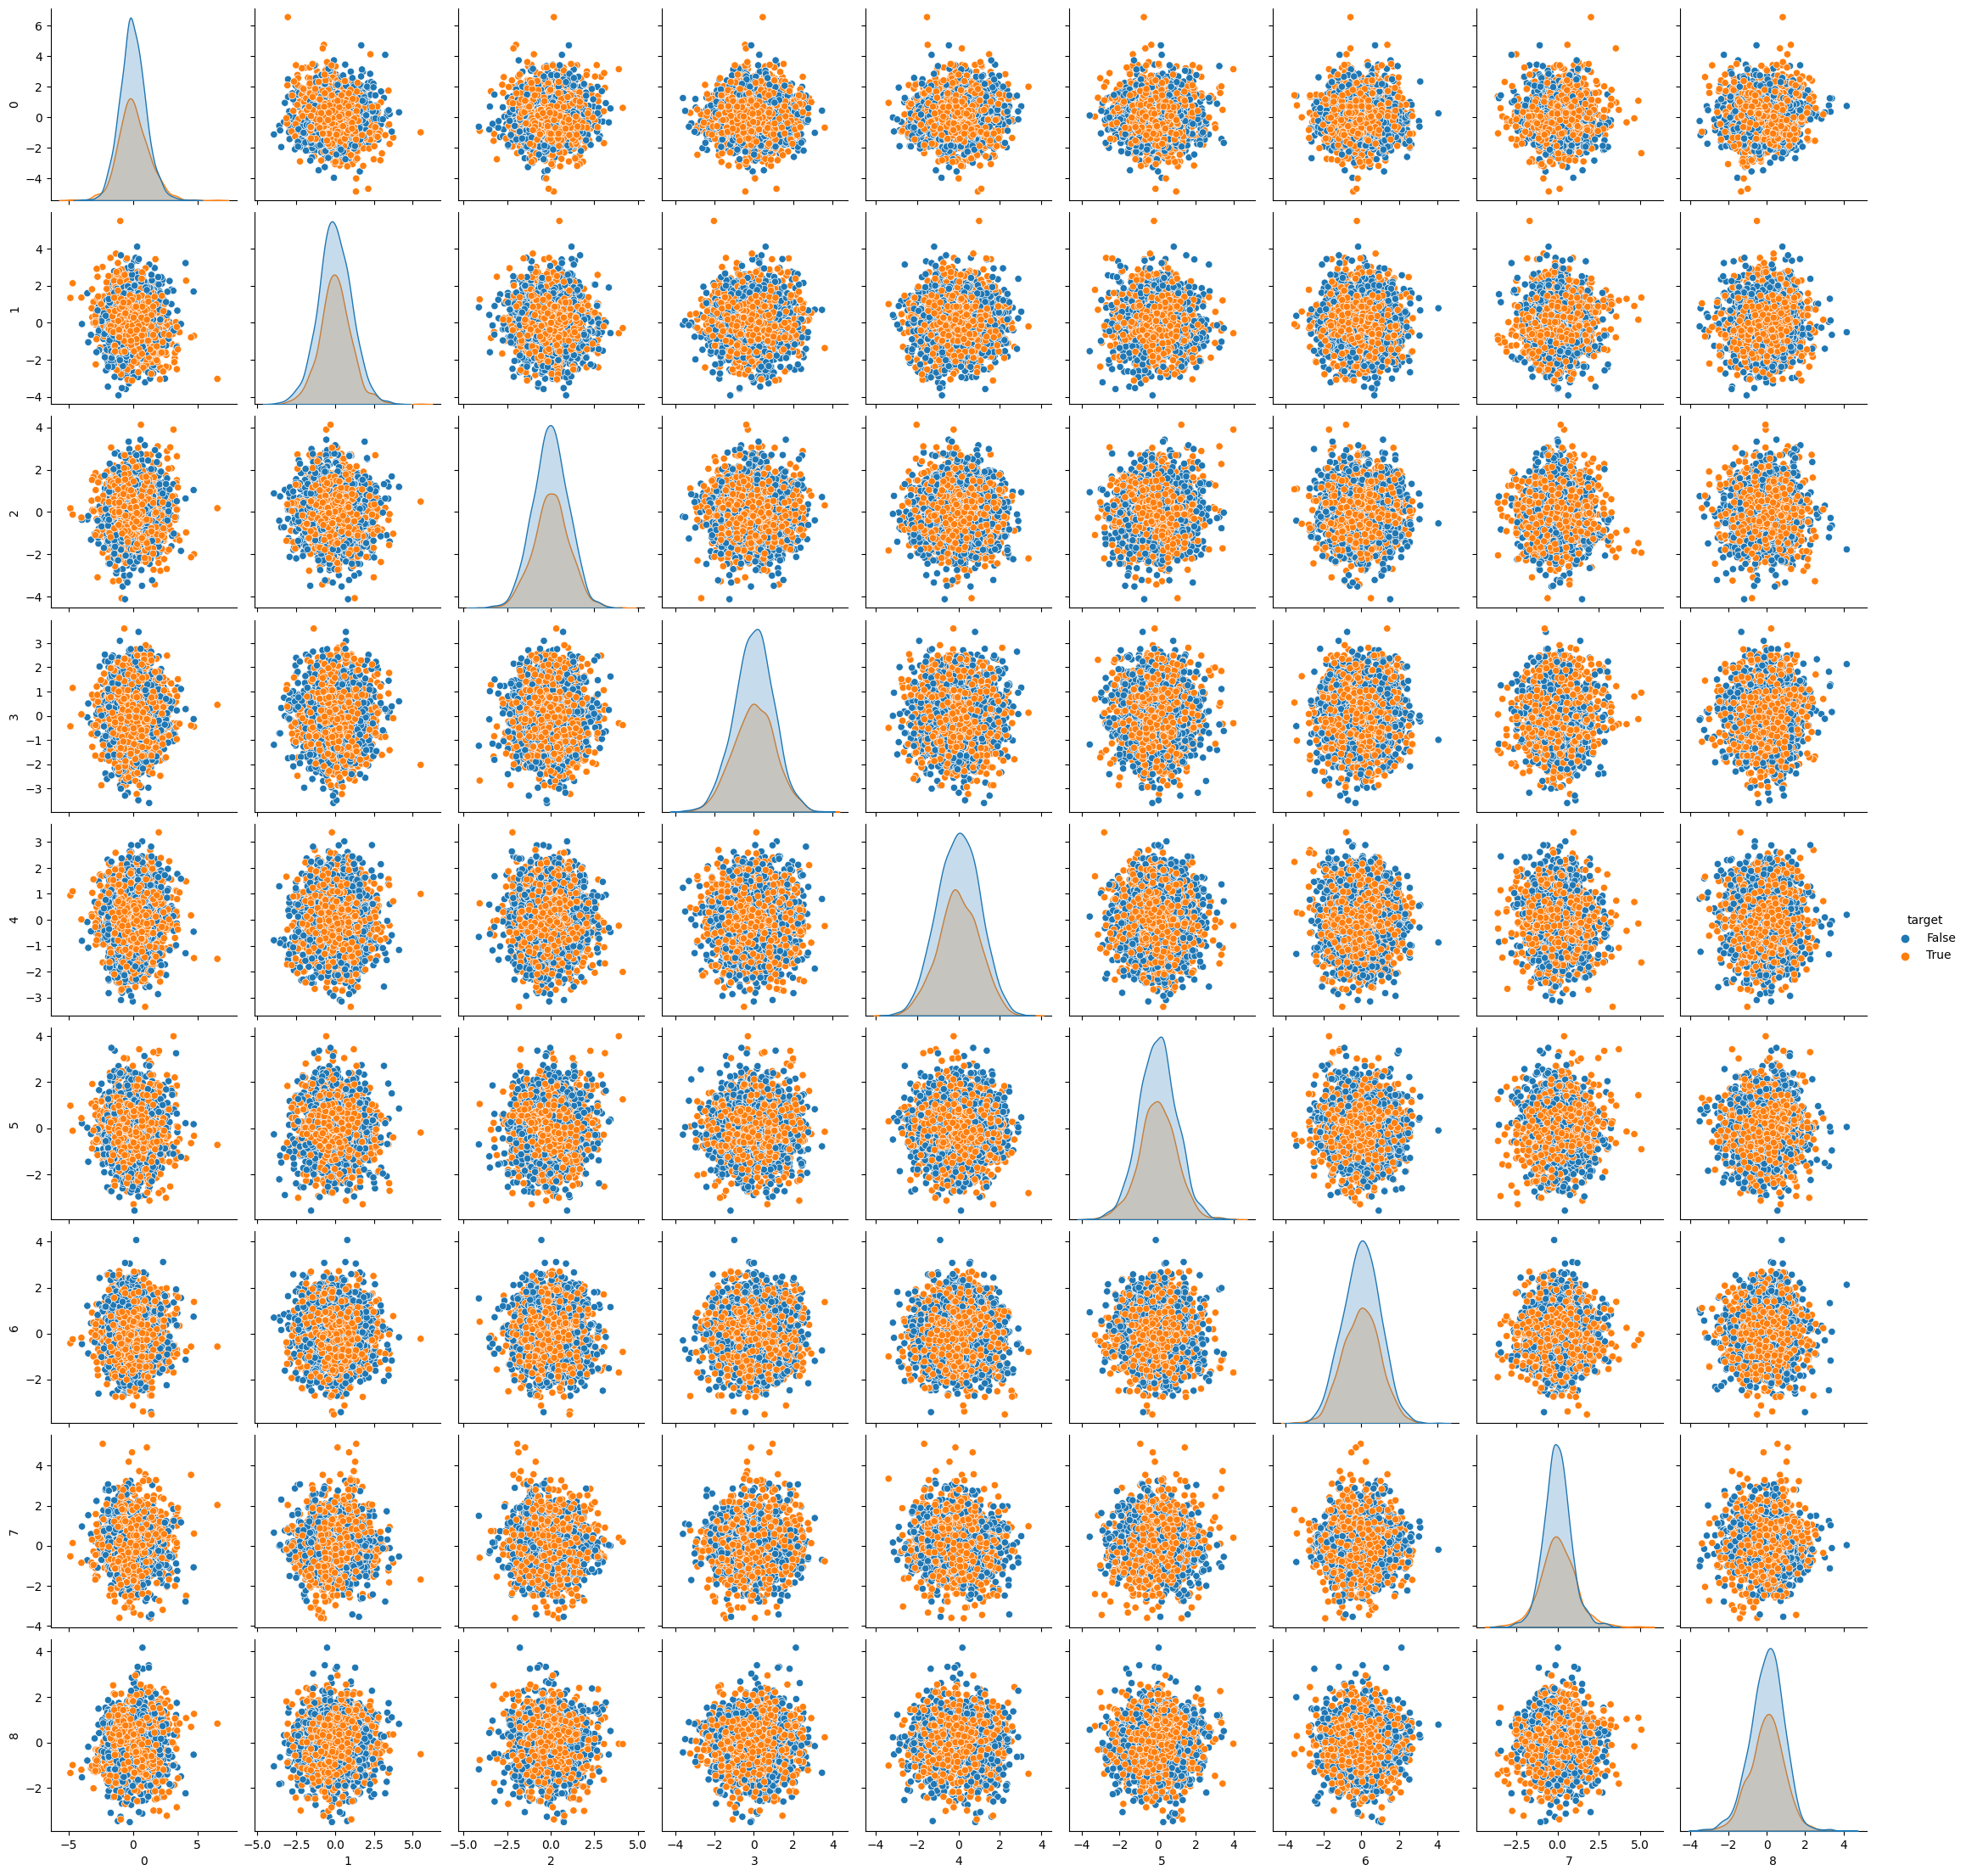

In [ ]:
#Revisamos si el pca salió bien y observamos resultados en el pairplot

plt.figure(figsize =(15,8))
sns.heatmap(pca_df.corr(),annot =True,cmap = 'coolwarm') #grafico de la matriz de correlacion para ver si funciono correctamente el pca
plt.show()

sns.pairplot(pca_df, hue='target')




---


# 3) **Modelado**

- Probamos un modelo, para ver su rendimiento y ajuste a los datos que tenemos.




In [ ]:
#Train/Test Split

X_train, X_test, y_train, y_test = train_test_split(df_standar, y.astype('bool'), test_size=0.25, random_state=42)

**Random Forest simple**

In [ ]:
#Instanciamos un Clasificador RandomForest, simple sin hiperparámetros.
clf = RandomForestClassifier(max_depth=None, random_state=11)

#Realizamos el entrenamiento sobre los datos de entrenamiento (valga la redundancia)
clf.fit(X_train,y_train)

#Guardamos las prediccions que hace el modelo sobre train
train_pred = clf.predict(X_train)




---
# 4) **Evaluando en train**

- Vamos a evaluar nuestro modelo con la Curva ROC y el AUC ROC, para poder
analizar el rendimiento del clasificador.
- Observaremos la matriz de confusión con el especial interés de minimizar los Falsos positivos.
- A modo de control, también observaremos el accuracy.

---





 --> Creamos una función para visualizar las métricas que nos interesa evaluar y ahorrar bloques de código grandes.

In [ ]:
def metric_calc(model, X_train, y_train):
  # Entrenar el modelo
  model.fit(X_train, y_train)

  # Realizar predicciones en el conjunto de prueba
  y_pred = model.predict(X_train)

  # Calcular la precisión del modelo
  accuracy = accuracy_score(y_train, y_pred)

  #Certeza del modelo, para crear la curva roc
  y_scores = model.predict_proba(X_train)[:, 1]

  # Calcular la curva ROC :)
  fpr, tpr, thresholds = roc_curve(y_train, y_scores)

  # Calcular el área bajo la curva ROC (AUC)
  roc_auc = auc(fpr, tpr)

  # Encontrar coordenadas del punto más cercano al esquinero superior izquierdo (0, 1)
  distancias_al_origen = np.sqrt((1 - tpr)**2 + fpr**2)
  indice_umbral_cercano_al_origen = np.argmin(distancias_al_origen)

  # Obtener el umbral asociado al punto más cercano al esquinero superior izquierdo, para tener una idea.
  umbral_cercano_al_origen = thresholds[indice_umbral_cercano_al_origen]

  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, color='darkgreen', lw=2, label='Curva ROC')
  plt.scatter(fpr[indice_umbral_cercano_al_origen], tpr[indice_umbral_cercano_al_origen], color='red', label=f'Umbral cercano a (0, 1)')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlabel('Tasa de Falsos Positivos (FPR)')
  plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
  plt.title('Curva ROC')
  plt.legend(loc='lower right')
  plt.show()
  print(f"Precisión del modelo {model}:", accuracy)
  print(f'Umbral asociado al punto más cercano al esquinero superior izquierdo: {umbral_cercano_al_origen}')
  print('AUC ROC:', roc_auc)
  print('Accuracy en train:', accuracy_score(y_train, model.predict(X_train)))




---


--> Creamos una segunda función, para realizar validaciones cruzadas y visualizar
los outputs que nos interesan

In [ ]:
#Cross validate genérico para ahorrar lineas de código

def validation(model, X_set, y_set):
  cv_results = cross_validate(model, X_set, y_set, cv=4,scoring=('accuracy', 'roc_auc') ,return_train_score=True)

  print("Accuracy Scores as Test:", cv_results['test_accuracy'], ' Score:', np.mean(list(cv_results['test_accuracy']))) #Con "as Test" Se refiere al rendimiento en accuracy que obtuvo cada fold cuando le tocó ser "Test" en la validación
  print("AUC-ROC Scores as Test:", cv_results['test_roc_auc'],' Score:', np.mean(list(cv_results['test_roc_auc'])))  #Con "as Test" Se refiere al rendimiento en roc_auc que obtuvo cada fold cuando le tocó ser "Test" en la validación
  print("Train Accuracy Scores:", cv_results['train_accuracy'], ' Score:', np.mean(list(cv_results['train_accuracy'])))
  print("Train AUC-ROC Scores:", cv_results['train_roc_auc'], ' Score:', np.mean(list(cv_results['train_roc_auc'])))
  print('Diccionario completo:', cv_results)






---



**Evaluamos en Train**

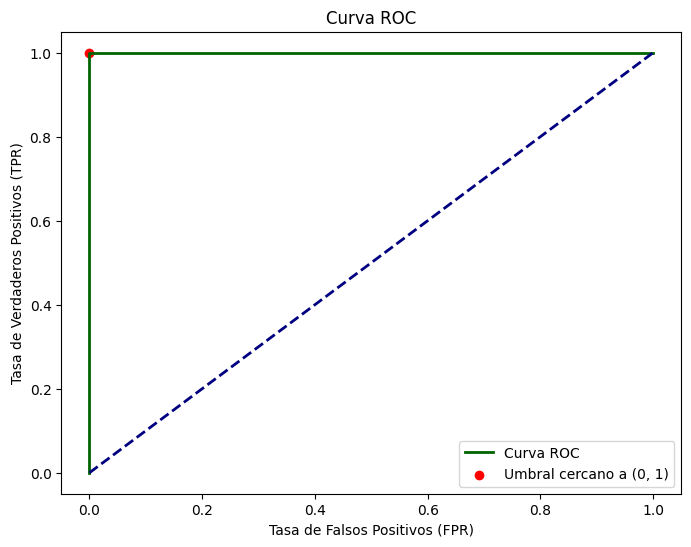

Precisión del modelo RandomForestClassifier(random_state=11): 1.0
Umbral asociado al punto más cercano al esquinero superior izquierdo: 0.58
AUC ROC: 1.0
Accuracy en train: 1.0


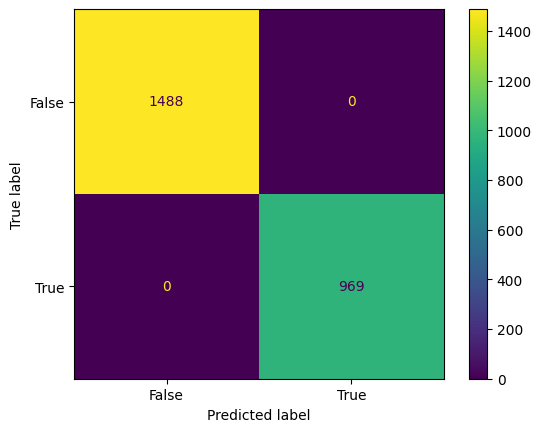

In [ ]:
#Calculamos las métricas que nos interesan
metric_calc(clf, X_train, y_train)

# Matriz de confusión para ver cómo le fue en el entrenamiento
matriz=confusion_matrix(y_train, train_pred)
disp_rforest=ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train)
disp_rforest

**Validación Cruzada**

In [ ]:
#Validación cruzada
validation(clf, X_train, y_train.astype('bool'))

Accuracy Scores as Test: [0.65528455 0.65309446 0.6514658  0.66775244]  Score: 0.6568993141071475
AUC-ROC Scores as Test: [0.67010155 0.66546699 0.62848796 0.67204301]  Score: 0.6590248773166663
Train Accuracy Scores: [1. 1. 1. 1.]  Score: 1.0
Train AUC-ROC Scores: [1. 1. 1. 1.]  Score: 1.0
Diccionario completo: {'fit_time': array([0.80205417, 0.79262614, 0.76728702, 0.77586484]), 'score_time': array([0.04274344, 0.04684758, 0.04180336, 0.04499912]), 'test_accuracy': array([0.65528455, 0.65309446, 0.6514658 , 0.66775244]), 'train_accuracy': array([1., 1., 1., 1.]), 'test_roc_auc': array([0.67010155, 0.66546699, 0.62848796, 0.67204301]), 'train_roc_auc': array([1., 1., 1., 1.])}




---

**IMPORTANCIA DE FEATURES**
- Hacemos un análisis de importancia de features para el clasificador, buscando entender cuáles atributos están aportando señal.


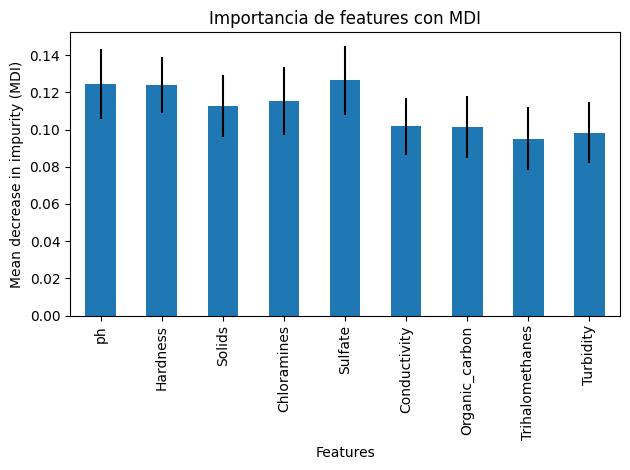

In [ ]:
#Indagamos en el algoritmo para ver que atributo está levantando señal


#Para indexar los nombres de los features al plot.
keys = list(dict(dfp.drop('Potability', axis=1)).keys())
idx = pd.DataFrame(X_train,y_train).columns = keys


importancias = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

clf_importances = pd.Series(importancias, index=idx)

fig, ax = plt.subplots()
clf_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Importancia de features con MDI")
ax.set_ylabel("Mean decrease in impurity (MDI)")
ax.set_xlabel('Features')
fig.tight_layout()

# 5) **Iteración sobre resultados del PCA**

- Repetimos estos pasos sobre el dataset que obtuvimos del pca para analizar resultados basados en metricas.


In [ ]:
# Seteamos x e y nuevos
X_pca = pca.fit_transform(df_standar)

y_pca = dfp['Potability'].astype('bool')

pca_df = pd.DataFrame(X_pca, y_pca)

pca_df

0         1         2         3         4         5  \
Potability                                                               
False      -0.615153  0.013759 -0.035239  1.689525 -1.240867 -0.964821   
False       0.765338  2.406033 -1.870650 -0.089878 -1.096166  0.205864   
False      -0.989116 -0.930208  0.313004  0.734205  0.605919  1.306835   
False      -0.826206 -0.417832  0.474392  1.114870 -0.152722  0.641698   
False      -0.207871 -0.601879 -0.080653 -1.837368  0.058569 -0.410180   
...              ...       ...       ...       ...       ...       ...   
True        2.239667  1.457524 -1.107809  0.092231 -0.276050  0.239809   
True       -1.115598 -0.744828 -0.611858  0.999385  1.356037  0.981904   
True        0.286476 -0.387304 -0.049193  0.762971 -0.037501 -0.791075   
True        0.041581  0.279649  1.450233 -0.515362 -0.720600 -0.620821   
True       -1.071876 -0.786127  0.451692  1.560826  1.702807 -0.216181   

                   6         7         8  
Potability                                
False      -1.242419 -0.667780 -1.005817  
False      -0.738266 -1.188980  1.315346  
False      -0.565601  0.212516 -0.418194  
False       2.420148  0.080512 -0.830430  
False      -1.024945  1.594226  0.945861  
...              ...       ...       ...  
True       -0.236103 -0.611321 -2.167220  
True       -0.076439  0.125296  0.447805  
True       -0.650237  1.933128 -0.848436  
True        0.520590 -1.741222  0.359257  
True       -0.168713  0.264178  0.334090  

[3276 rows x 9 columns]

In [ ]:
#Train Test Split para la data del pca
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.25, random_state=44)


Random Forest en PCA

In [ ]:
clf.fit(X_train_pca,y_train_pca)

train_pred_pca = clf.predict(X_train_pca)



---
**Evaluamos esta iteración, en los datos de entrenamiento**


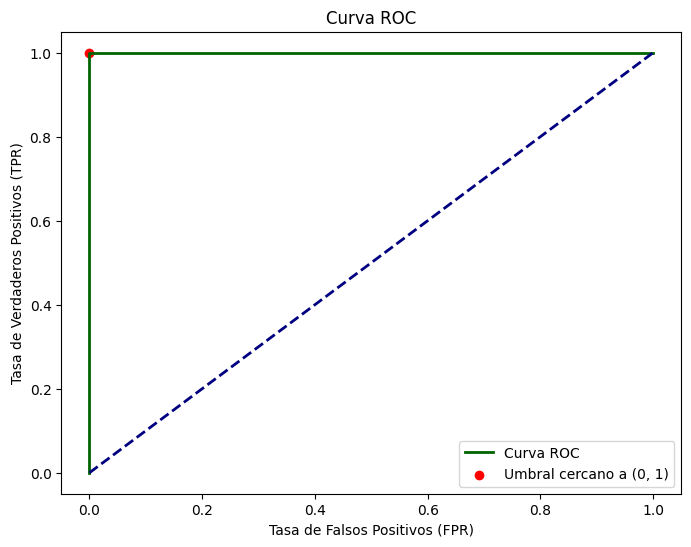

Precisión del modelo RandomForestClassifier(random_state=11): 1.0
Umbral asociado al punto más cercano al esquinero superior izquierdo: 0.59
AUC ROC: 1.0
Accuracy en train: 1.0


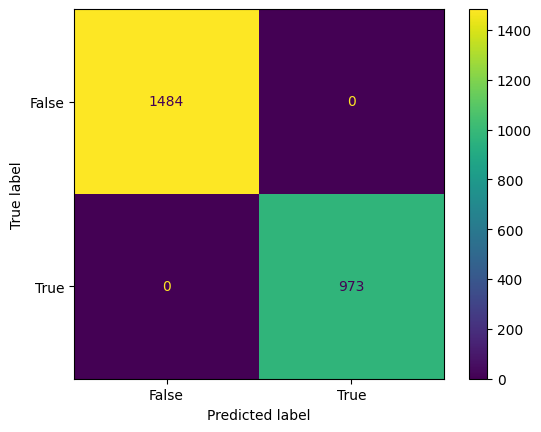

In [ ]:
metric_calc(clf, X_train_pca, y_train_pca)
matriz_pca = confusion_matrix(y_train_pca, train_pred_pca)
disp_pca=ConfusionMatrixDisplay.from_estimator(clf, X_train_pca, y_train_pca)
disp_pca

In [ ]:
validation(clf, X_train_pca, y_train_pca)

Accuracy Scores as Test: [0.64878049 0.62703583 0.65798046 0.66449511]  Score: 0.6495729721140859
AUC-ROC Scores as Test: [0.65570456 0.64894124 0.66277329 0.64794294]  Score: 0.6538405089308105
Train Accuracy Scores: [1. 1. 1. 1.]  Score: 1.0
Train AUC-ROC Scores: [1. 1. 1. 1.]  Score: 1.0
Diccionario completo: {'fit_time': array([0.80205083, 0.82953119, 0.82377124, 0.75833106]), 'score_time': array([0.03981662, 0.03613162, 0.038589  , 0.03914165]), 'test_accuracy': array([0.64878049, 0.62703583, 0.65798046, 0.66449511]), 'train_accuracy': array([1., 1., 1., 1.]), 'test_roc_auc': array([0.65570456, 0.64894124, 0.66277329, 0.64794294]), 'train_roc_auc': array([1., 1., 1., 1.])}


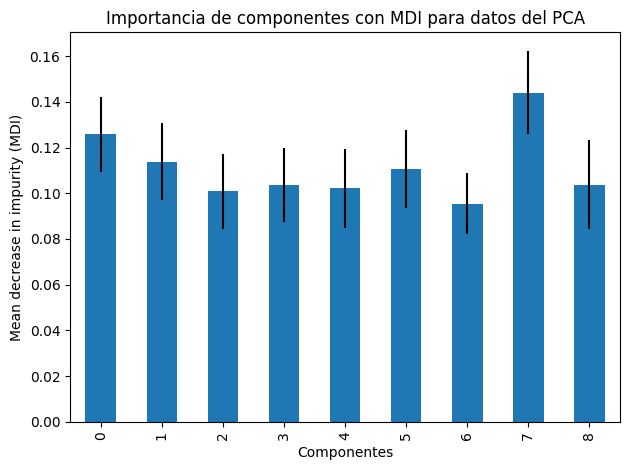

In [ ]:
importancias = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

clf_importances = pd.Series(importancias, index=list(dict(pd.DataFrame(X_pca)).keys()))

fig, ax = plt.subplots()
clf_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Importancia de componentes con MDI para datos del PCA")
ax.set_ylabel("Mean decrease in impurity (MDI)")
ax.set_xlabel('Componentes')
fig.tight_layout()



---

# 6) **Evaluación en Test**
- Evaluamos el rendimiento en test para nuestro clasificador, para los datos del pca y para los datos originales estandarizados.



In [ ]:
def metric_calc_test(model, X_train, X_test, y_train, y_test):
  # Entrenar el modelo
  model.fit(X_train, y_train)

  # Realizar predicciones en el conjunto de prueba
  y_pred = model.predict(X_test)

  # Calcular la precisión del modelo en test
  accuracy = accuracy_score(y_test, y_pred)

  #Certeza del modelo en test, para crear la curva roc
  y_scores = model.predict_proba(X_test)[:, 1]

  # Calcular la curva ROC en test :)
  fpr, tpr, thresholds = roc_curve(y_test, y_scores)

  # Calcular el área bajo la curva ROC (AUC) en test
  roc_auc = auc(fpr, tpr)

  # Encontrar coordenadas del punto más cercano al esquinero superior izquierdo (0, 1)
  distancias_al_origen = np.sqrt((1 - tpr)**2 + fpr**2)
  indice_umbral_cercano_al_origen = np.argmin(distancias_al_origen)

  # Obtener el umbral asociado al punto más cercano al esquinero superior izquierdo, fines gráficos unicamente.
  umbral_cercano_al_origen = thresholds[indice_umbral_cercano_al_origen]

  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, color='darkgreen', lw=2, label='Curva ROC del modelo')
  plt.scatter(fpr[indice_umbral_cercano_al_origen], tpr[indice_umbral_cercano_al_origen], color='red', label=f'Umbral cercano a (0, 1)')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='clasificador aleatorio')
  plt.xlabel('Tasa de Falsos Positivos (FPR)')
  plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
  plt.title('Curva ROC')
  plt.legend(loc='lower right')
  plt.show()
  print("Precisión del modelo}:", accuracy)
  print(f'Umbral asociado al punto más cercano al esquinero superior izquierdo: {umbral_cercano_al_origen}')
  print('AUC ROC:', roc_auc)
  print('Accuracy en test:', accuracy_score(y_test, model.predict(X_test)))
  matriz_test = confusion_matrix(y_test, y_pred)
  disp_test=ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,display_labels=['No Potable', 'Potable'])
  print(disp_test)


**Evaluamos Random Forest en test**

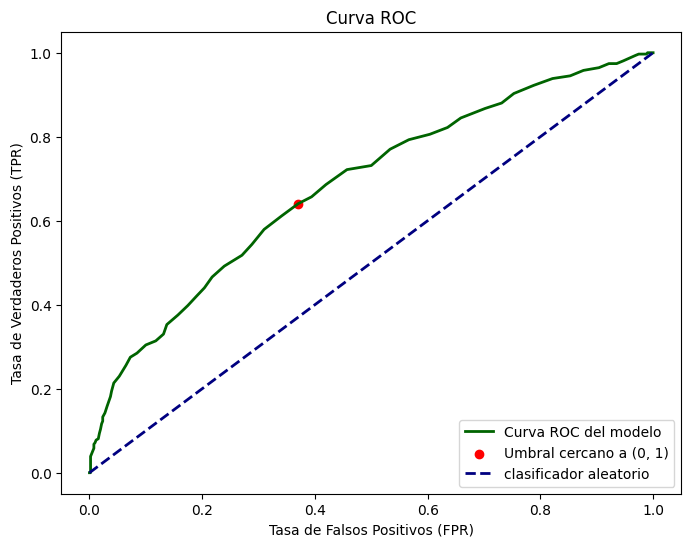

Precisión del modelo}: 0.6654456654456654
Umbral asociado al punto más cercano al esquinero superior izquierdo: 0.39
AUC ROC: 0.6830573005901389
Accuracy en test: 0.6654456654456654


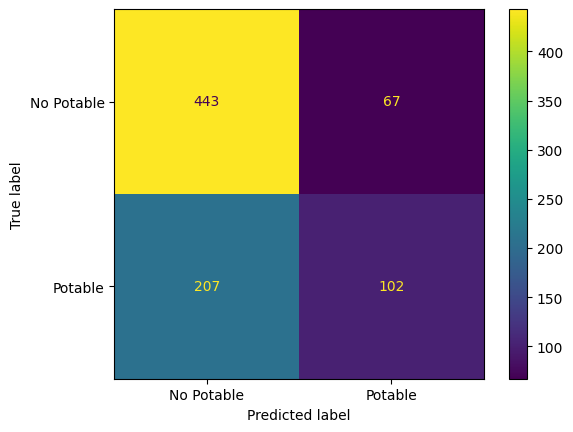

In [ ]:
metric_calc_test(clf, X_train, X_test, y_train, y_test)




---
**Evaluamos el desempeño en el conjunto de prueba de los datos del PCA**


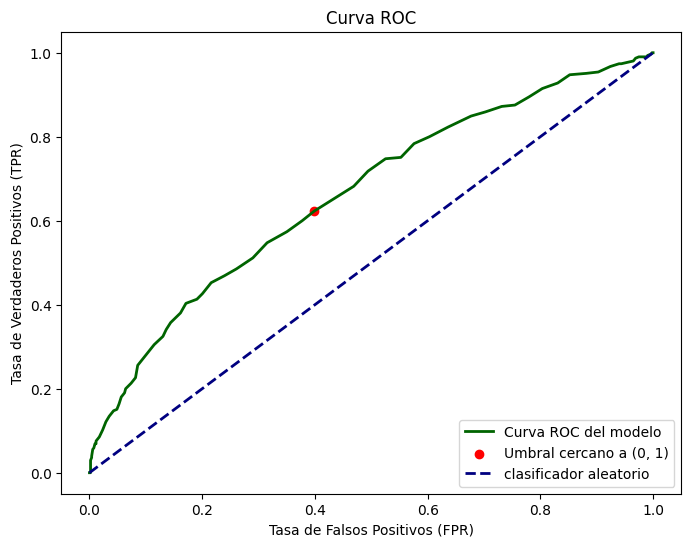

Precisión del modelo}: 0.6678876678876678
Umbral asociado al punto más cercano al esquinero superior izquierdo: 0.4
AUC ROC: 0.6629648529693181
Accuracy en test: 0.6678876678876678


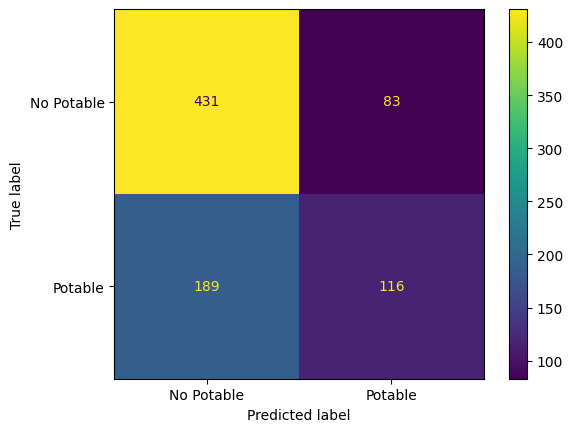

In [ ]:
metric_calc_test(clf, X_train_pca, X_test_pca, y_train_pca, y_test_pca)